<a href="https://colab.research.google.com/github/KadeF10/Baseball-Analytics/blob/main/Project_2_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This data gives a basic analysis on songs from Spotify. This data helps determine variables in a song such as its acousticness,danceability, and energy. In this project I am focusing on the relationship between energy and variables such as liveness, loudness,tempo, and speechiness.

In [2]:
import requests 
import pandas as pd
url= 'https://raw.githubusercontent.com/KadeF10/Spotify/main/data.csv'
df = pd.read_csv(url)
df.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
lm = LinearRegression()
lm

LinearRegression()

In [5]:
X = df[['liveness']]
Y = df['energy']

In [6]:
lm.fit(X,Y)

LinearRegression()

In [7]:
Yhat=lm.predict(X)
Yhat[0:5]   

array([0.6739761 , 0.66574096, 0.67221143, 0.65256473, 0.75456285])

In [8]:
lm.intercept_

0.625447581381173

In [9]:
lm.coef_

array([0.29411223])

In [10]:
Z = df[['liveness', 'loudness', 'speechiness', 'tempo']]

In [11]:
lm.fit(Z, df['energy'])

LinearRegression()

In [12]:
lm.intercept_

0.8993571716351044

In [13]:
lm.coef_

array([0.13546384, 0.04124532, 0.03032687, 0.00037669])

In [14]:
# import the visualization package: seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

(0.0, 1.04716)

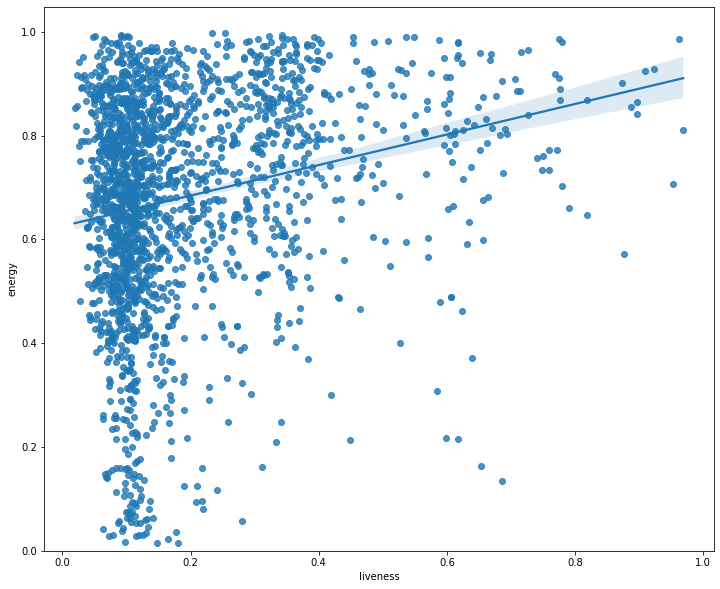

In [15]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="liveness", y="energy", data=df)
plt.ylim(0,)

(0.0, 1.071998327962928)

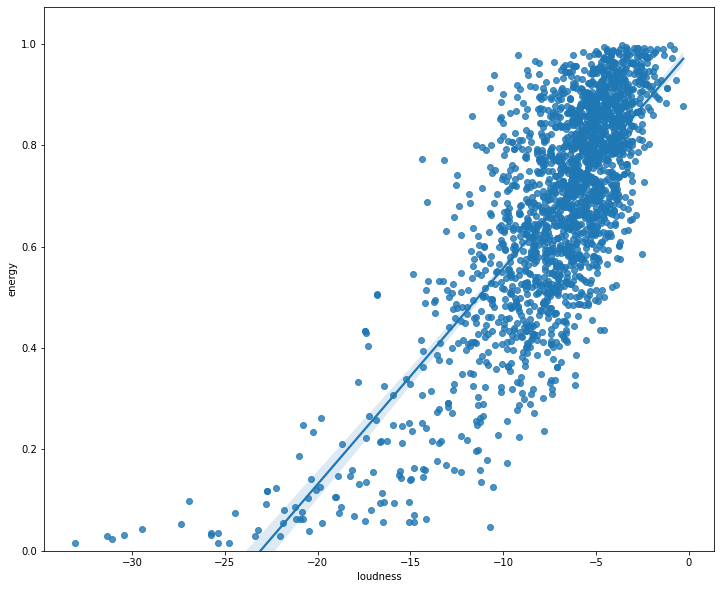

In [16]:
plt.figure(figsize=(width, height))
sns.regplot(x="loudness", y="energy", data=df)
plt.ylim(0,)

(0.0, 1.04716)

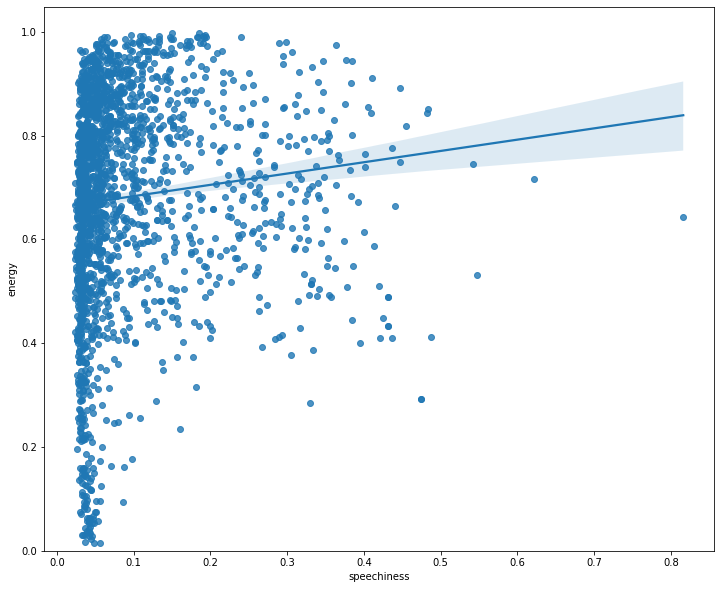

In [17]:
plt.figure(figsize=(width, height))
sns.regplot(x="speechiness", y="energy", data=df)
plt.ylim(0,)

(0.0, 1.04716)

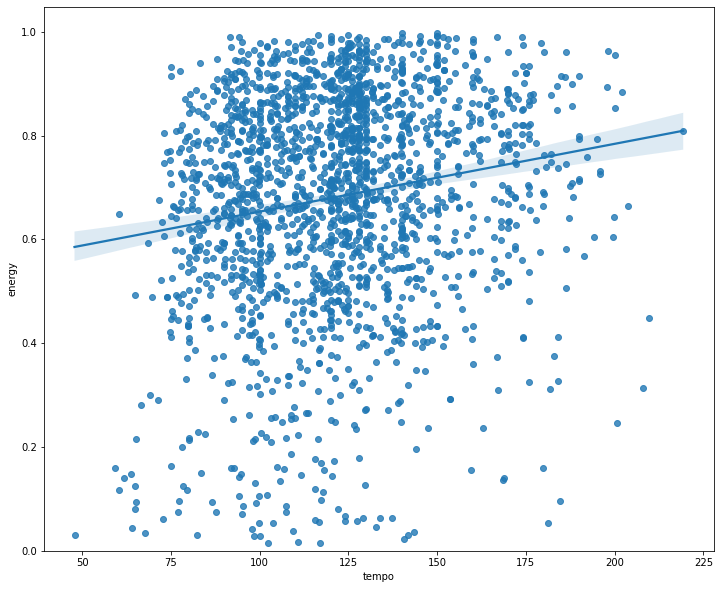

In [18]:
plt.figure(figsize=(width, height))
sns.regplot(x="tempo", y="energy", data=df)
plt.ylim(0,)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


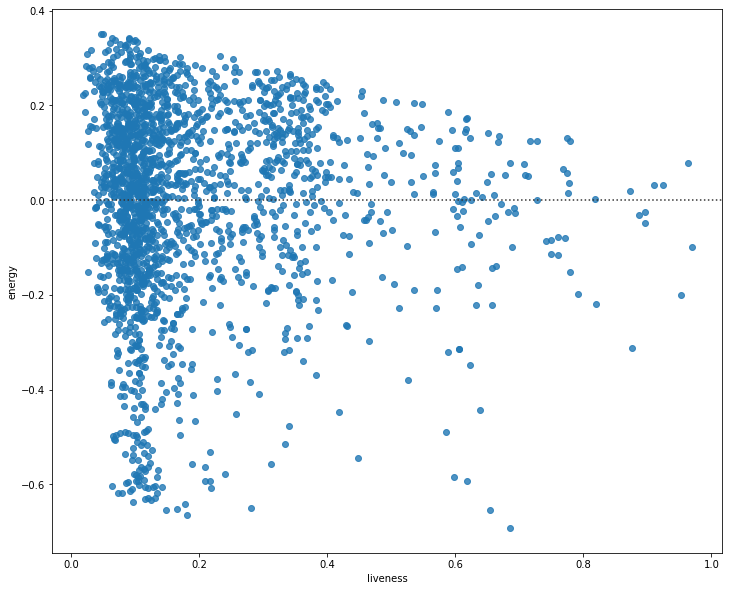

In [19]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['liveness'], df['energy'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


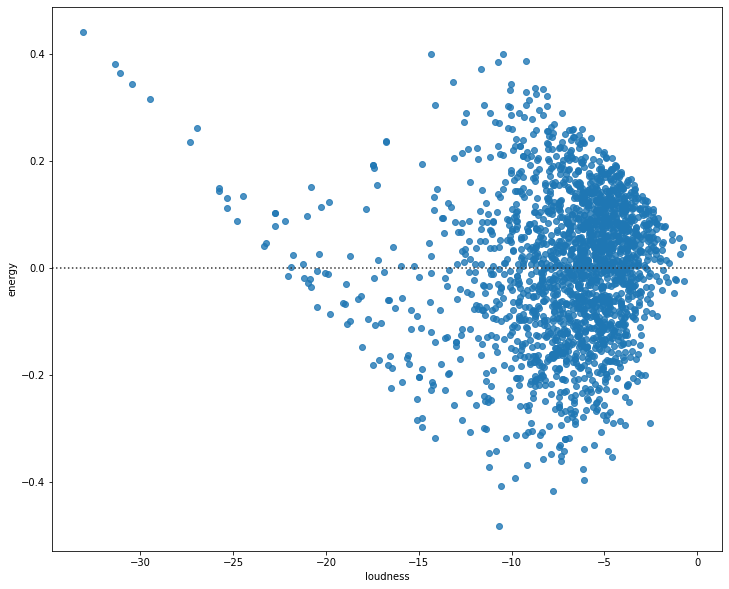

In [20]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['loudness'], df['energy'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


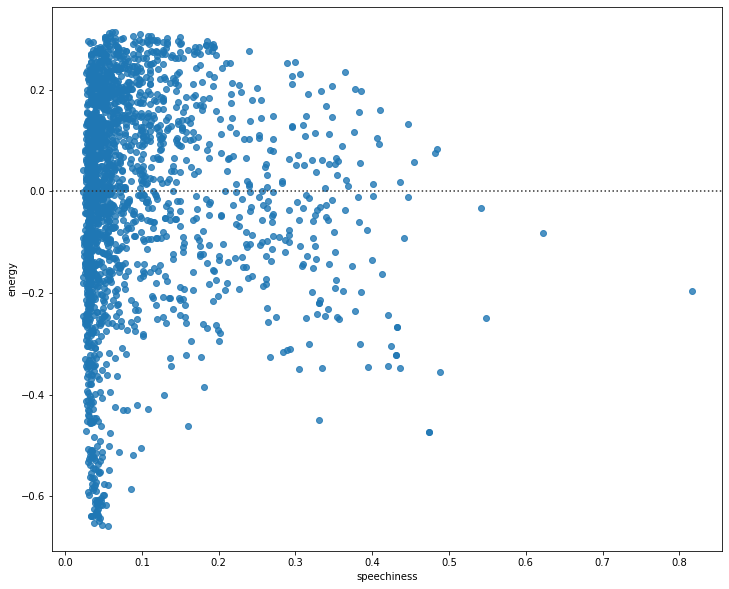

In [21]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['speechiness'], df['energy'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


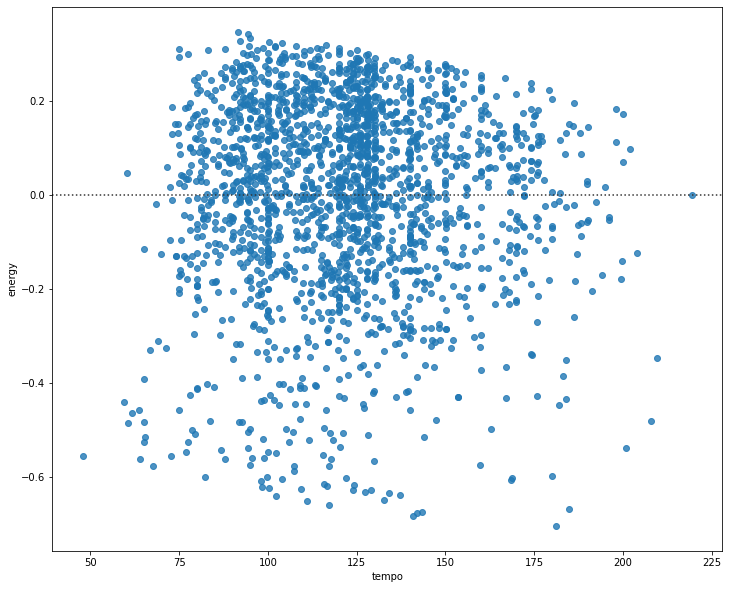

In [22]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['tempo'], df['energy'])
plt.show()

In [23]:
Y_hat = lm.predict(Z)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


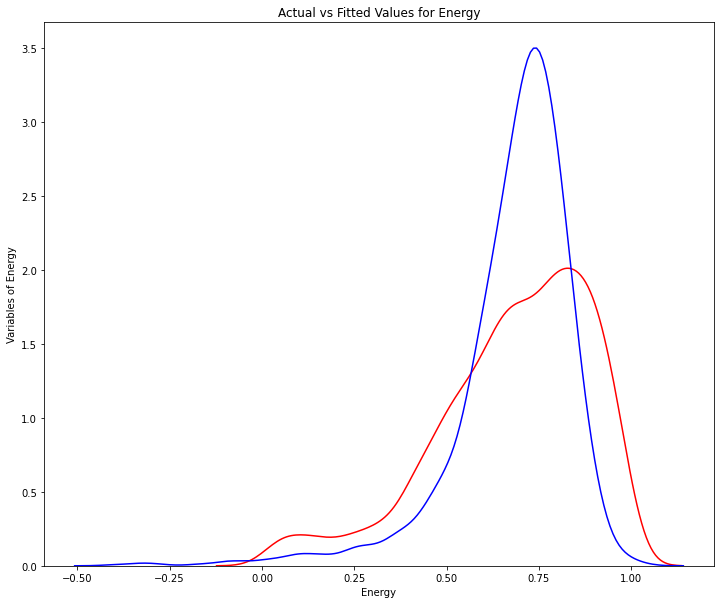

In [24]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['energy'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Energy')
plt.xlabel('Energy')
plt.ylabel('Variables of Energy')

plt.show()
plt.close()

In [25]:

lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.047277909014334596


In [26]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [0.6739761  0.66574096 0.67221143 0.65256473]


In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
mse = mean_squared_error(df['energy'], Yhat)
print('The mean square error of energy and predicted value is: ', mse)

The mean square error of energy and predicted value is:  0.04210347324898522


In [1]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Energy ~ Spotify')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Energy')

    plt.show()
    plt.close()

In [31]:
from ipywidgets import interact, interactive, fixed, interact_manual

In [32]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Energy')
    plt.ylabel('Factors of Energy')

    plt.show()
    plt.close()

In [33]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Energy')
    plt.legend()

In [34]:
y_data = df['energy']

x_data=df.drop('energy',axis=1)

In [35]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 202
number of training samples: 1815


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [39]:
lre=LinearRegression()
lre.fit(x_train[['liveness']], y_train)
lre.score(x_test[['liveness']], y_test)
lre.score(x_train[['liveness']], y_train)



0.0473896915852654

In [40]:
Rcross = cross_val_score(lre, x_data[['liveness']], y_data, cv=4)
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are -0.005476962265493851 and the standard deviation is 0.018104170466477044


In [41]:
from sklearn.model_selection import cross_val_predict

In [42]:
yhat = cross_val_predict(lre,x_data[['liveness']], y_data,cv=4)
yhat[0:5]

array([0.67238983, 0.66278809, 0.67033231, 0.6474253 , 0.76634972])

In [43]:
lr = LinearRegression()
lr.fit(x_train[['liveness', 'loudness', 'speechiness', 'tempo']], y_train)

LinearRegression()

In [44]:
yhat_train = lr.predict(x_train[['liveness', 'loudness', 'speechiness', 'tempo']])
yhat_train[0:5]

array([0.28278107, 0.69046741, 0.77019382, 0.71958648, 0.69694522])

In [45]:
yhat_test = lr.predict(x_test[['liveness', 'loudness', 'speechiness', 'tempo']])
yhat_test[0:5]

array([0.74414764, 0.7957574 , 0.72881614, 0.77586373, 0.87683247])

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


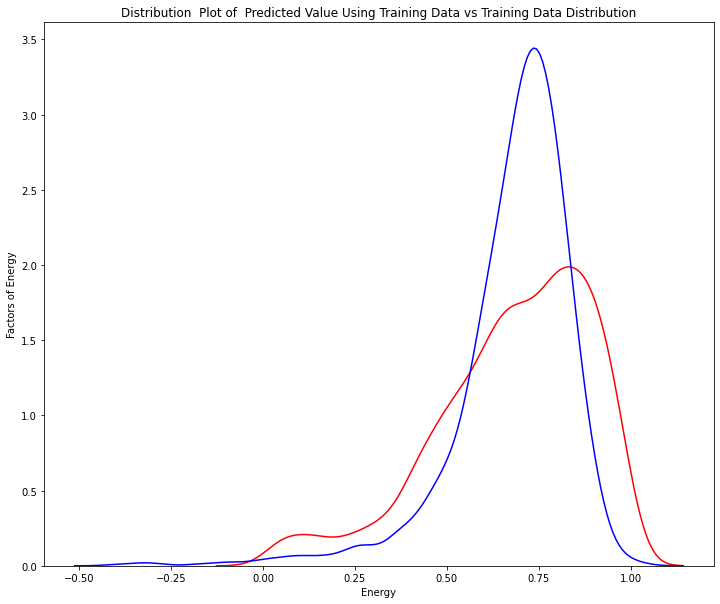

In [47]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


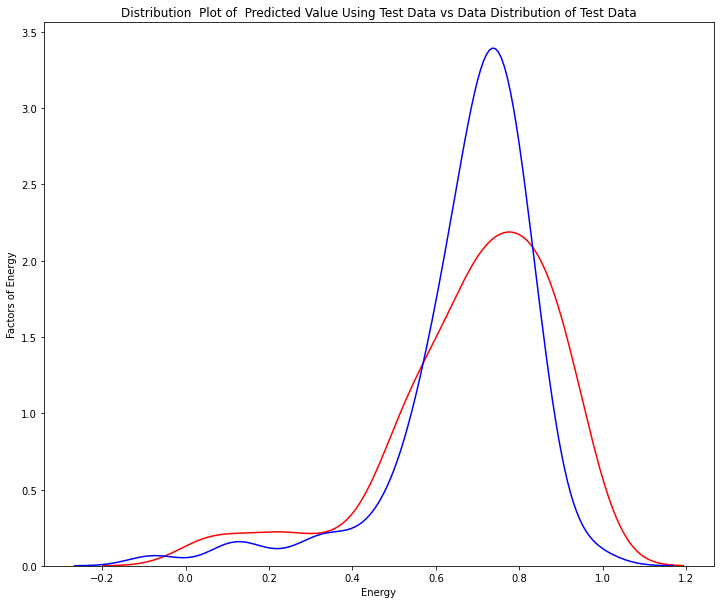

In [48]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)